In [1]:
import requests
from pathlib import Path

def download_file(url, local_filename=None):
    if local_filename is None:
        local_filename = url.split('/')[-1]
    # Stream the download to handle large files
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(local_filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                f.write(chunk)
    return local_filename

url = 'https://zenodo.org/record/5700987/files/Criteo_x1.zip'

# Download the file and save it to the local directory
downloaded_file = download_file(url)
print(f"File downloaded and saved as: {downloaded_file}")


File downloaded and saved as: Criteo_x1.zip


In [2]:
import zipfile
import os
from pathlib import Path

# Name of the zip file
zip_name = "Criteo_x1.zip"

data_dir = Path()

print("Extracting dataset...")

# Ensure the zip file exists before attempting to extract
zip_path = data_dir / zip_name
if zip_path.exists():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)
    print(f"Extracted to {data_dir}.")
else:
    print(f"Zip file not found at {zip_path}. Please check the file path.")


Extracting dataset...
Extracted to ..


Data Exploration 

    Pearson Correlation

          label        I1        I2        I3        I4        I5        I6  \
label  1.000000  0.155944  0.051900 -0.086154 -0.056836 -0.130083 -0.099671   
I1     0.155944  1.000000  0.036529  0.041062  0.132071 -0.237793 -0.179097   
I2     0.051900  0.036529  1.000000 -0.074889 -0.083222 -0.018936 -0.024170   
I3    -0.086154  0.041062 -0.074889  1.000000  0.368557 -0.030109  0.046525   
I4    -0.056836  0.132071 -0.083222  0.368557  1.000000 -0.176867  0.041437   
I5    -0.130083 -0.237793 -0.018936 -0.030109 -0.176867  1.000000  0.121092   
I6    -0.099671 -0.179097 -0.024170  0.046525  0.041437  0.121092  1.000000   
I7     0.165841  0.477721  0.032823  0.007386  0.087583 -0.230841 -0.054678   
I8    -0.031162  0.181367 -0.030091  0.276245  0.560517 -0.246192  0.084962   
I9     0.030066  0.085661  0.001185  0.030442  0.217332 -0.137570  0.355272   
I10    0.191959  0.656253  0.041144  0.036530  0.163117 -0.330171 -0.250610   
I11    0.209889  0.334560  0.035267 -0.006684  0.103

<Figure size 1500x1500 with 0 Axes>

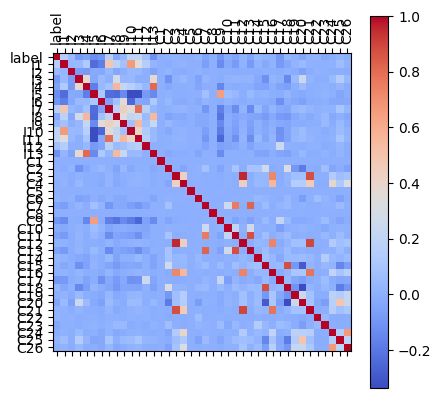

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import multiprocessing

filename = "./train.csv"

num_cores = int(0.8 * multiprocessing.cpu_count())
os.environ["NUMEXPR_NUM_THREADS"] = str(num_cores)
os.environ["OMP_NUM_THREADS"] = str(num_cores)
pd.set_option('display.max_columns', None)

def compute_correlation(file_name):
    df = pd.read_csv(file_name)

    # pearson correlation for the numerical fields
    correlation_matrix = df.corr(method='pearson')
    correlation_matrix.to_csv('PearsonCorrelation.csv')
    print(correlation_matrix)

    # average cell correlation.
    column_sums = correlation_matrix.sum()
    adjusted_sums = column_sums - 1
    total_sum = adjusted_sums.sum()
    result = total_sum / 1521
    print("Average Pearson cell correlation: ", result)
    plt.figure(figsize=(15, 15))
    cax = plt.matshow(correlation_matrix, cmap='coolwarm')
    plt.colorbar(cax)
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.show()

if __name__ == "__main__":
    compute_correlation(filename)


For Deep Interest Networks we want to retain as much dimensionality as possible. Therefore no dimensionality reduction or feature selection will be used.

          label        I1        I2        I3        I4        I5        I6  \
label  1.000000  0.198511  0.015323 -0.100262 -0.063445 -0.168438 -0.060572   
I1     0.198511  1.000000  0.039125  0.077563  0.197739 -0.664842 -0.162247   
I2     0.015323  0.039125  1.000000  0.038483  0.115565 -0.041708  0.011153   
I3    -0.100262  0.077563  0.038483  1.000000  0.535512 -0.091334  0.085744   
I4    -0.063445  0.197739  0.115565  0.535512  1.000000 -0.215420  0.162923   
I5    -0.168438 -0.664842 -0.041708 -0.091334 -0.215420  1.000000  0.190224   
I6    -0.060572 -0.162247  0.011153  0.085744  0.162923  0.190224  1.000000   
I7     0.217732  0.462870  0.019528  0.023747  0.166262 -0.356773  0.353212   
I8    -0.043126  0.227329  0.071770  0.377237  0.634667 -0.221952  0.236135   
I9     0.015418  0.053186  0.039957  0.121041  0.321936 -0.038275  0.540651   
I10    0.189900  0.919149  0.040399  0.075636  0.192222 -0.665196 -0.181045   
I11    0.224060  0.424039  0.021861  0.021407  0.161

<Figure size 1500x1500 with 0 Axes>

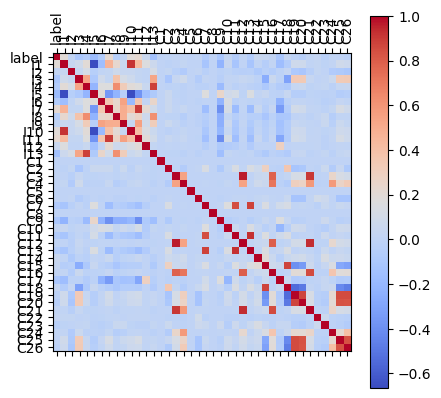

In [5]:
num_cores = int(0.8 * multiprocessing.cpu_count())
os.environ["NUMEXPR_NUM_THREADS"] = str(num_cores)
os.environ["OMP_NUM_THREADS"] = str(num_cores)
pd.set_option('display.max_columns', None)

def compute_spearman_correlation(file_name):
    df = pd.read_csv(file_name)

    # Compute the spearman correlation for the fields
    spearman_correlation_matrix = df.corr(method='spearman')
    spearman_correlation_matrix.to_csv('SpearmanCorrelation.csv')

    print(spearman_correlation_matrix)
    column_sums = spearman_correlation_matrix.sum()
    adjusted_sums = column_sums - 1
    total_sum = adjusted_sums.sum()
    result = total_sum / 1521
    print("Average Spearman cell correlation: ", result)
    plt.figure(figsize=(15, 15))
    cax = plt.matshow(spearman_correlation_matrix, cmap='coolwarm')
    plt.colorbar(cax)
    plt.xticks(range(len(spearman_correlation_matrix.columns)), spearman_correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(spearman_correlation_matrix.columns)), spearman_correlation_matrix.columns)
    plt.show()

    return spearman_correlation_matrix

if __name__ == "__main__":
    compute_spearman_correlation(filename)



Model creation

In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout

filename = "./train.csv"
# change depending on memory constraints
split = 8

# Function to create the model
def create_model(integer_features_shape):
    # Define model inputs
    integer_inputs = Input(shape=(integer_features_shape,), dtype=tf.float16, name="integer_inputs")
    categorical_inputs = [Input(shape=(1,), dtype=tf.int16, name=f"categorical_input_{i}") for i in range(1, 27)]

    # Embeddings for categorical features
    categorical_embeddings = [Embedding(input_dim=2**16, output_dim=10, input_length=1)(cat_input) for cat_input in categorical_inputs]
    categorical_embeddings = [Flatten()(embedding) for embedding in categorical_embeddings]

    # Concatenate all features
    concatenated_features = Concatenate()([integer_inputs] + categorical_embeddings)

    # Fully connected layers
    x = Dense(256, activation="relu")(concatenated_features)
    x = Dropout(0.5)(x)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation="sigmoid")(x)

    # Create and compile the model
    model = Model(inputs=[integer_inputs] + categorical_inputs, outputs=output)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model

# Calculate total rows and chunk size
total_rows = sum(1 for row in open(filename)) - 1
chunk_size = total_rows // split
# Create the model
model = create_model(integer_features_shape=13)
try:
    # Process each chunk
    for chunk_iter in range(split):
        start_row = chunk_iter * chunk_size
        nrows = chunk_size if chunk_iter < split - 1 else total_rows - start_row

        chunk = pd.read_csv(filename, skiprows=range(1, start_row + 1), nrows=nrows, header=0)

        # Preprocess the chunk
        labels = chunk["label"].values
        integer_features = chunk.filter(regex="^I").values
        categorical_features = chunk.filter(regex="^C").values

        # Convert categorical features to list of arrays for model input
        categorical_data = [categorical_features[:, i].reshape(-1, 1) for i in range(categorical_features.shape[1])]
        print("Current Split: ", chunk_iter + 1)
        # Train the model on the current chunk
        model.fit([integer_features] + categorical_data, labels, epochs=1, batch_size=4000)
except KeyboardInterrupt:
    print("\nTraining interrupted. Saving current model...")
    model.save("interrupted_model.h5")

# Save the model after training is complete
model.save("final_model.h5")

# Load and preprocess validation data
validation_data_file = "./valid.csv"
validation_df = pd.read_csv(validation_data_file)
validation_labels = validation_df["label"].values
validation_integer_features = validation_df.filter(regex="^I").values
validation_categorical_features = validation_df.filter(regex="^C").values
validation_categorical_data = [validation_categorical_features[:, i].reshape(-1, 1) for i in range(validation_categorical_features.shape[1])]


# Evaluate the model
evaluation_metrics = model.evaluate([validation_integer_features] + validation_categorical_data, validation_labels)
model.save("trained_validated_model.h5")
print("Evaluation Metrics:", evaluation_metrics)

Current Split:  1
1032/1032 [==============================] - 38s 34ms/step - loss: 0.4748 - accuracy: 0.7796
Current Split:  2
1032/1032 [==============================] - 35s 34ms/step - loss: 0.4685 - accuracy: 0.7827
Current Split:  3
1032/1032 [==============================] - 35s 34ms/step - loss: 0.4684 - accuracy: 0.7815
Current Split:  4
1032/1032 [==============================] - 35s 34ms/step - loss: 0.4641 - accuracy: 0.7845
Current Split:  5
1032/1032 [==============================] - 35s 34ms/step - loss: 0.4632 - accuracy: 0.7847
Current Split:  6
1032/1032 [==============================] - 35s 34ms/step - loss: 0.4655 - accuracy: 0.7822
Current Split:  7
1032/1032 [==============================] - 35s 34ms/step - loss: 0.4587 - accuracy: 0.7866
Current Split:  8
257817/257817 [==============================] - 1946s 8ms/step - loss: 0.4613 - accuracy: 0.7865
Evaluation Metrics: [0.4612692892551422, 0.7864720821380615]


In [3]:
import pandas as pd
from keras.models import load_model

# Load the trained model
model = load_model("trained_validated_model.h5") # Change depending on which model you want to test

# Function to preprocess the data
def preprocess_data(df):
    integer_features = df.filter(regex="^I").values
    categorical_features = df.filter(regex="^C").values
    categorical_data = [categorical_features[:, i].reshape(-1, 1) for i in range(categorical_features.shape[1])]
    return [integer_features] + categorical_data

# Load the test data
test_data_file = "./test.csv"
test_df = pd.read_csv(test_data_file)

# Extract features and labels
test_labels = test_df["label"].values
test_features = preprocess_data(test_df)



# Evaluate the model on the test data
evaluation_metrics = model.evaluate(test_features, test_labels)
print("Evaluation Metrics on Test Data:", evaluation_metrics)



143349/143349 [==============================] - 1132s 8ms/step - loss: 0.4609 - accuracy: 0.7867
Evaluation Metrics on Test Data: [0.46086379885673523, 0.7867001295089722]
